Preparing the Environment

In [8]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt

Loading the Dataset

In [9]:
X = pd.read_csv("logisticX (1).csv").values  
Y = pd.read_csv("logisticY.csv").values  

# Normalizing X
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

Implementing Logistic Regression

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, Y, theta):
    m = len(Y)
    h = sigmoid(np.dot(X, theta))
    return (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)
    cost_history = []
    
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - Y)) / m
        theta -= alpha * gradient
        cost_history.append(cost_function(X, Y, theta))
    
    return theta, cost_history


Training the Model (Q1 & Q2)

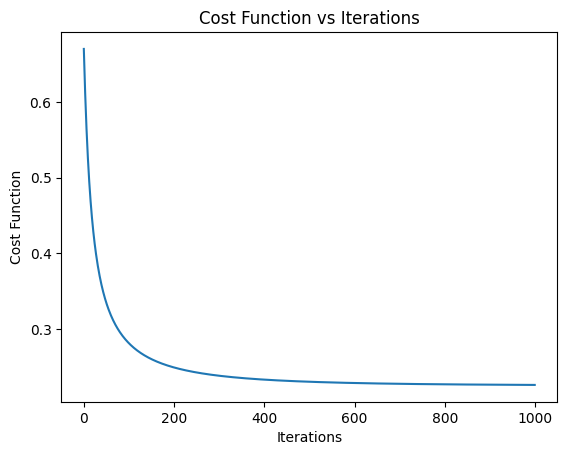

Final Cost Function Value: 0.22614000056086003
Final Learning Parameters (Theta values):
[[ 0.38193936]
 [ 2.35449296]
 [-2.53913828]]


In [11]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding bias term  
theta = np.zeros((X_b.shape[1], 1))  
alpha = 0.1  
iterations = 1000  

theta_optimal, cost_history = gradient_descent(X_b, Y, theta, alpha, iterations)

# Plotting cost function vs iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Iterations")
plt.show()

final_cost = cost_history[-1]
print("Final Cost Function Value:", final_cost)
print("Final Learning Parameters (Theta values):")
print(theta_optimal)



Plotting Decision Boundary (Q3)

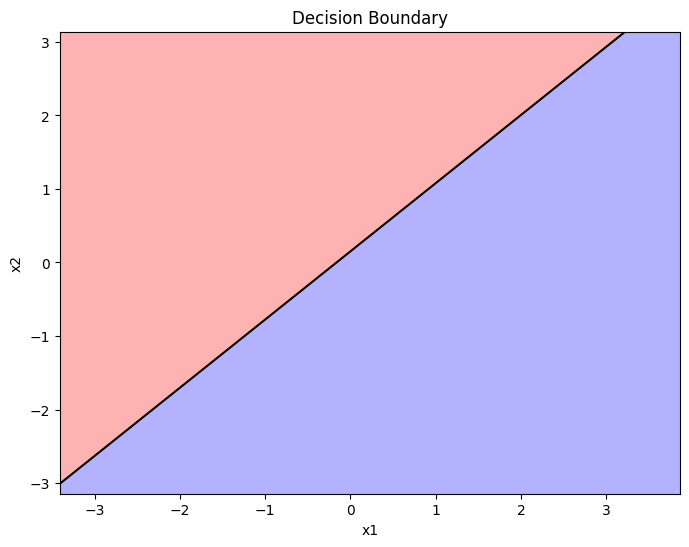

In [18]:
plt.figure(figsize=(8,6))

# Creating a meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Computing predictions for each point in the grid
grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
Z = sigmoid(np.dot(grid, theta_optimal)).reshape(xx.shape)

# Plotting decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0.5], colors='black')  # Decision boundary

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")
plt.show()


Training with different Learning Rates (Q4)

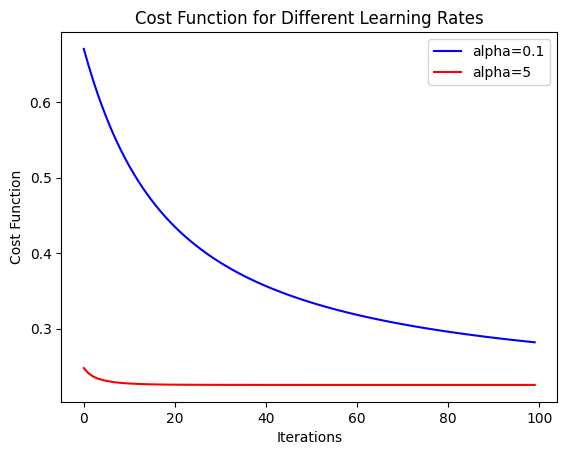

In [13]:
alpha_1 = 0.1  
alpha_2 = 5  
iterations = 100  

_, cost_1 = gradient_descent(X_b, Y, np.zeros((X_b.shape[1], 1)), alpha_1, iterations)  
_, cost_2 = gradient_descent(X_b, Y, np.zeros((X_b.shape[1], 1)), alpha_2, iterations)  

plt.plot(range(iterations), cost_1, label="alpha=0.1", color="blue")  
plt.plot(range(iterations), cost_2, label="alpha=5", color="red")  
plt.xlabel("Iterations")  
plt.ylabel("Cost Function")  
plt.title("Cost Function for Different Learning Rates")  
plt.legend()  
plt.show()  

Calculating Performance Metrics

In [14]:
def confusion_matrix_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    return np.array([[TN, FP], [FN, TP]])

def accuracy_manual(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score_manual(y_true, y_pred):
    precision = precision_manual(y_true, y_pred)
    recall = recall_manual(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Predictions  
y_pred = sigmoid(np.dot(X_b, theta_optimal)) >= 0.5  

# Computing Metrics Manually  
conf_matrix = confusion_matrix_manual(Y.flatten(), y_pred.flatten())
accuracy = accuracy_manual(Y.flatten(), y_pred.flatten())
precision = precision_manual(Y.flatten(), y_pred.flatten())
recall = recall_manual(Y.flatten(), y_pred.flatten())
f1 = f1_score_manual(Y.flatten(), y_pred.flatten())

# Printing Results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
 [[44  5]
 [ 7 43]]
Accuracy: 0.8787878787878788
Precision: 0.8958333333333334
Recall: 0.86
F1 Score: 0.8775510204081632
